<a href="https://colab.research.google.com/github/Modupeolawuraola/Image-Classification-of-Natural-Scene--CNN-project-/blob/main/Modupeola_Fagbenro_Final_Project_IM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Notebook-Configuration" data-toc-modified-id="Notebook-Configuration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Notebook Configuration</a></span><ul class="toc-item"><li><span><a href="#Google-drive" data-toc-modified-id="Google-drive-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Google drive</a></span></li><li><span><a href="#Warning" data-toc-modified-id="Warning-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Warning</a></span></li><li><span><a href="#Matplotlib" data-toc-modified-id="Matplotlib-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Matplotlib</a></span></li><li><span><a href="#TensorFlow" data-toc-modified-id="TensorFlow-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>TensorFlow</a></span></li><li><span><a href="#Random-seed" data-toc-modified-id="Random-seed-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Random seed</a></span></li></ul></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Testing" data-toc-modified-id="Testing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Testing</a></span></li></ul></div>

<b>
<p>
<center>
<font size="5">
Popular Machine Learning Methods: Idea, Practice and Math
</font>
</center>
</p>

<p>
<center>
<font size="4">
Final Project: Convolutional Neural Networks
</font>
</center>
</p>
    
<p>
<center>
<font size="4">
Intel Image Classification
</font>
</center>
</p>

<p>
<center>
<font size="3">
Data Science, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>

<p>
<center>
<font size="3">
Modupeola Fagbenro
</font>
</center>
</p>
</b>

# Overview

- This Project aims to calssify intel image, this is the image of natural scene around the world  .
- See the accompanied slides in our [github repository](https://github.com/yuxiaohuang/teaching/blob/main/machine_learning_I/spring_2024/slides/p3_deep_learning/p3_c2_supervised_learning/p3_c2_s3_convolutional_neural_networks/convolutional_neural_networks.pdf).
- Here we will work on kaggle  Dataset [intel image](https://www.kaggle.com/datasets/puneet6060/intel-image-classification).
- The goal of this project is to develop neural network capable of calssifying diverse naturtal scene images such as forest, beaches and building. Tweaking the pipeline (including data preprocessing using resnet50, building, compiling and training DNNs) implemented in [/p3 c2 s3 convolutional_neural_networks/case_study](https://github.com/yuxiaohuang/teaching/blob/main/machine_learning_I/spring_2024/code/p3_deep_learning/p3_c2_supervised_learning/p3_c2_s3_convolutional_neural_networks/case_study/case_study.ipynb) to make it work for the new dataset mentioned.


# Notebook Configuration

## Google drive

In [ ]:
import os

# Get the current working directory in Google Colab
current_directory = '/content/'

# Print the current directory
print(current_directory)

/content/


In [ ]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/MyDrive/Colab_Notebooks/Homework/final_project /intel_image'

# Get the absolute path of the deep utilities folder
abspath_util_deep = '/content/drive/MyDrive/Colab_Notebooks/Homework/final_project /intel_image'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -p kaggle


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -p


In [ ]:
#Configuration environment
import os

os.environ['KAGGLE_USERNAME'] = "fagbenromodupeola" # username from the json file
os.environ['KAGGLE_KEY'] = "5ee2000121d425abaaa88ac57563da3e"# key from the json file

## Warning

In [ ]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

## Matplotlib

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

## TensorFlow

In [ ]:
# The magic below allows us to use tensorflow version 2.x
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


## Random seed

In [ ]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

# Data Preprocessing

In [ ]:
# Change working directory to the absolute path of the deep utilities folder
%cd $abspath_util_deep

# Import the deep utitilities
%run pmlm_utilities_deep.ipynb

/content/drive/MyDrive/Colab_Notebooks/Homework/final_project /intel_image 


# **Loading the Dataset**

**Creating the directory for the data**

In [ ]:
import os

# Make directory
directory = os.path.dirname(abspath_curr + '/dataa/')
if not os.path.exists(directory):
    os.makedirs(directory)

**Downloading the data to the directory**

In [ ]:

!kaggle datasets download -d puneet6060/intel-image-classification -p dataa

100% 345M/346M [00:16<00:00, 22.5MB/s]
100% 346M/346M [00:16<00:00, 22.2MB/s]


**Unzip the downloded folder **

In [ ]:
!ls dataa

intel-image-classification.zip	seg_pred  seg_test  seg_train


In [ ]:
import zipfile
import os

# Define the path to the downloaded ZIP file
zip_file_path =  "/content/drive/MyDrive/Colab_Notebooks/Homework/final_project /intel_image /dataa/intel-image-classification.zip"

# Define the directory where you want to extract the contents of the ZIP file
extract_data = "dataa"

# Create the extract directory if it doesn't exist
if not os.path.exists(extract_data):
    os.makedirs(extract_data)

# Unzip the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_data)

print("Dataset extraction complete.")


Dataset extraction complete.


**Getting the name of the target**

In [ ]:
target = 'label'

**Getting the info**

In [ ]:
!ls dataa

intel-image-classification.zip	seg_pred  seg_test  seg_train


In [ ]:

# Define image dimensions
img_height, img_width = 224, 224

# Define batch size
batch_size = 32



#Create training dataset

train_dataset = tf.keras.utils.image_dataset_from_directory(abspath_curr + ' /dataa/seg_train/seg_train',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True,
    seed=1337,
    # label_mode="categorical"  # Uncomment this line if you want one-hot encoded labels
)



print("Datasets loaded successfully.")





Found 14034 files belonging to 6 classes.
Datasets loaded successfully.


In [ ]:
#create a test dataset
#Path to the test dataset folder

test_folder_path = "/kaggle/input/intel-image-classification/seg_test"

# Create test dataset
test_dataset = tf.keras.utils.image_dataset_from_directory(abspath_curr + ' /dataa/seg_test/seg_test',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False,
    # label_mode="categorical"  # Uncomment this line if you want one-hot encoded labels
)

# Print a success message
print("Datasets loaded successfully.")

Found 3000 files belonging to 6 classes.
Datasets loaded successfully.


**Getting Info in the Dataset**

In [ ]:
#getting information from the train dataset

# Path to the train dataset folder
train_folder_path = abspath_curr + ' /dataa/seg_train/seg_train'


# Get the list of subfolders (each representing a class)
class_folders = os.listdir(train_folder_path)

print(class_folders)

# Get the number of classes
num_classes = len(class_folders)

print(f"Number of classes in the train dataset: {num_classes}")


['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
Number of classes in the train dataset: 6


In [ ]:
#getting info friom
# Path to the train dataset folder (update this path to your actual dataset path)
train_folder_path = abspath_curr + ' /dataa/seg_train/seg_train'

# Get the list of subfolders (each representing a class)
class_folders = os.listdir(train_folder_path)

# Get the number of classes
num_classes = len(class_folders)

print(f"Number of classes in the train dataset: {num_classes}")



Number of classes in the train dataset: 6


In [ ]:
import os

# Path to the train dataset folder (update this path to your actual dataset path)
train_folder_path = abspath_curr + ' /dataa/seg_train/seg_train'

# Get the list of subfolders (each representing a class)
class_folders = os.listdir(train_folder_path)

# Print features in each class
for class_name in class_folders:
    class_path = os.path.join(train_folder_path, class_name)
    num_samples = len(os.listdir(class_path))
    print(f"Class: {class_name}, Number of samples: {num_samples}")


Class: buildings, Number of samples: 2191
Class: forest, Number of samples: 2271
Class: glacier, Number of samples: 2404
Class: mountain, Number of samples: 2512
Class: sea, Number of samples: 2274
Class: street, Number of samples: 2382


## **Getting the training, validation data*


In [ ]:
import os

# Define the path for the new directory
new_directory = abspath_curr + ' /dataa/seg_val/seg_val'

# Create the new directory
os.makedirs(new_directory, exist_ok=True)

print(f"Directory '{new_directory}' created successfully.")


Directory '/content/drive/MyDrive/Colab_Notebooks/Homework/final_project /intel_image /dataa/seg_val/seg_val' created successfully.


In [ ]:
!pip install split-folders


In [ ]:
import os
import splitfolders

# Define the input folder where your training data is stored
train_folder = abspath_curr + ' /dataa/seg_train/seg_train'

# Define the output folder where you want to save the split datasets
output_folder = abspath_curr + ' /dataa/seg_val/seg_val'

# Split the training dataset with a specified ratio (train:validation)
splitfolders.ratio(train_folder, output=output_folder, seed=1337, ratio=(0.8, 0.2), group_prefix=None)

print("Dataset split into training and validation successfully.")




Copying files: 0 files [00:00, ? files/s]

Copying files: 1 files [00:00,  1.60 files/s]

Copying files: 7 files [00:00, 12.26 files/s]

Copying files: 13 files [00:00, 21.62 files/s]

Copying files: 21 files [00:00, 34.54 files/s]

Copying files: 28 files [00:01, 41.89 files/s]

Copying files: 34 files [00:01, 46.08 files/s]

Copying files: 42 files [00:01, 54.33 files/s]

Copying files: 50 files [00:01, 59.72 files/s]

Copying files: 57 files [00:01, 55.83 files/s]

Copying files: 64 files [00:01, 58.69 files/s]

Copying files: 72 files [00:01, 62.64 files/s]

Copying files: 81 files [00:01, 68.90 files/s]

Copying files: 89 files [00:01, 68.50 files/s]

Copying files: 97 files [00:02, 66.93 files/s]

Copying files: 104 files [00:02, 44.42 files/s]

Copying files: 110 files [00:02, 43.79 files/s]

Copying files: 117 files [00:02, 48.46 files/s]

Copying files: 124 files [00:02, 53.14 files/s]

Copying files: 132 files [00:02, 57.51 files/s]

Copying files: 141 files [00:02, 65.26 f

Dataset split into training and validation successfully.


In [ ]:
#checking the total images in train, and validation dataset
import os

# Define the paths to the training and validation folders
train_folder = abspath_curr +  ' /dataa/seg_val/seg_val/train'
val_folder = abspath_curr +  ' /dataa/seg_val/seg_val/val'

# Count the number of images in each folder
def count_images(folder_path):
    image_count = sum(len(files) for _, _, files in os.walk(folder_path))
    return image_count

# Get the total number of images in training and validation
total_train_images = count_images(train_folder)
total_val_images = count_images(val_folder)

# Print the results
print(f"Total training images: {total_train_images}")
print(f"Total validation images: {total_val_images}")

# List the classes (subdirectories) in the training and validation folders
train_classes = os.listdir(train_folder)
val_classes = os.listdir(val_folder)

print("\nTraining classes:")
for class_name in train_classes:
    print(f"- {class_name}")

print("\nValidation classes:")
for class_name in val_classes:
    print(f"- {class_name}")


Total training images: 11224
Total validation images: 2810

Training classes:
- buildings
- forest
- glacier
- mountain
- sea
- street

Validation classes:
- buildings
- forest
- glacier
- mountain
- sea
- street


In [ ]:
#checking the number of classes in train and validation dataset

# Define the paths to the training and validation folders
train_folder = abspath_curr +  ' /dataa/seg_val/seg_val/train'
val_folder = abspath_curr + ' /dataa/seg_val/seg_val/val'

# Get the list of class names in the training and validation folders
train_classes = os.listdir(train_folder)
val_classes = os.listdir(val_folder)

# Count the number of classes in the training and validation datasets
num_train_classes = len(train_classes)
num_val_classes = len(val_classes)

# Print the number of classes in the training and validation datasets
print(f"Number of classes in the training dataset: {num_train_classes}")
print(f"Number of classes in the validation dataset: {num_val_classes}")


Number of classes in the training dataset: 6
Number of classes in the validation dataset: 6


In [ ]:
import os

# Define the paths to the training and validation folders
train_folder = abspath_curr + ' /dataa/seg_val/seg_val/train'
val_folder = abspath_curr + ' /dataa/seg_val/seg_val/val'

# Count the number of images in each folder
def count_images(folder_path):
    image_count = sum(len(files) for _, _, files in os.walk(folder_path))
    return image_count

# Get the total number of images in training and validation
total_train_images = count_images(train_folder)
total_val_images = count_images(val_folder)

# Print the total number of images in training and validation
print(f"Total number of images in the training dataset: {total_train_images}")
print(f"Total number of images in the validation dataset: {total_val_images}")


Total number of images in the training dataset: 11224
Total number of images in the validation dataset: 2810


# **Visuliaze the dataset**

Exploratory Data Analysis- checking Class Distribution in trian, validation and test dataset

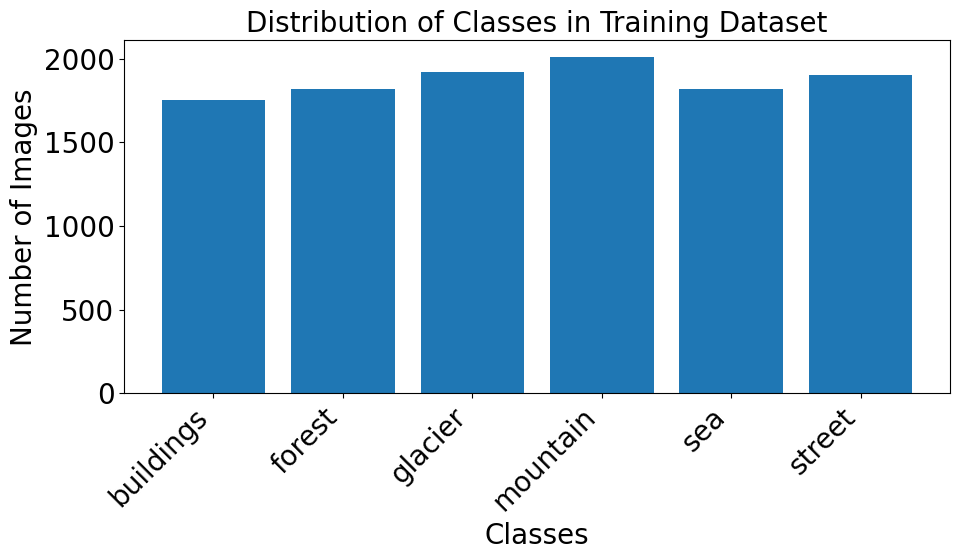

In [ ]:
import os
import matplotlib.pyplot as plt

# Define the path to the training folder
train_folder = abspath_curr + ' /dataa/seg_val/seg_val/train'

# Count the number of images in each class
class_counts = {}
for class_name in os.listdir(train_folder):
    class_path = os.path.join(train_folder, class_name)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        class_counts[class_name] = num_images

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Distribution of Classes in Training Dataset')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


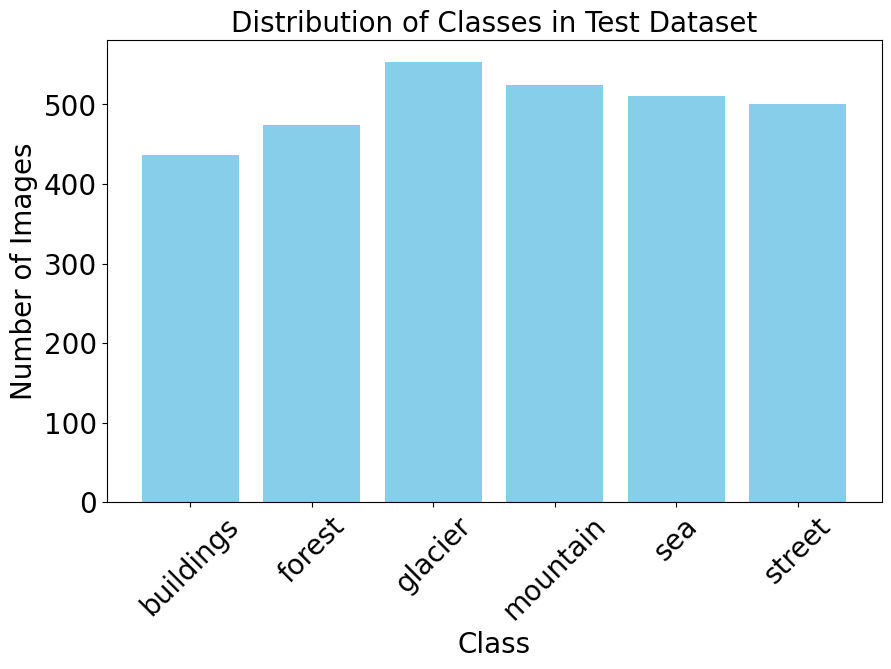

In [ ]:

# Define the path to the test folder
test_folder = abspath_curr + ' /dataa/seg_test/seg_test'

# Function to count the number of images in each class
def count_images(folder_path):
    class_counts = {}
    for class_name in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_name)
        if os.path.isdir(class_path):
            num_images = len(os.listdir(class_path))
            class_counts[class_name] = num_images
    return class_counts

# Count the number of images in each class for the test dataset
test_class_counts = count_images(test_folder)

# Plot the distribution of classes in the test dataset
plt.figure(figsize=(10, 6))
plt.bar(test_class_counts.keys(), test_class_counts.values(), color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Classes in Test Dataset')
plt.xticks(rotation=45)
plt.show()



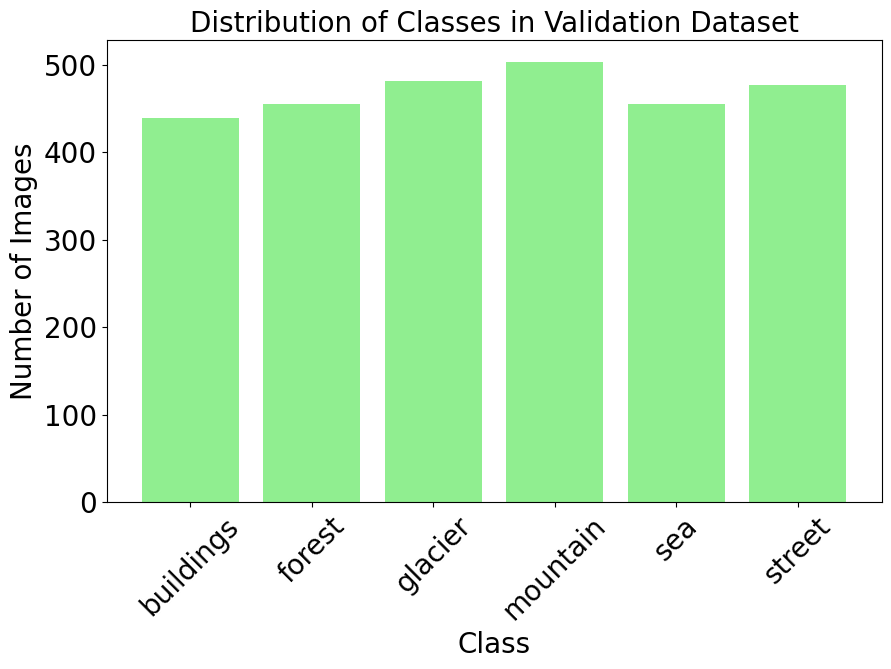

In [ ]:


# Define the path to the validation folder
val_folder = abspath_curr + ' /dataa/seg_val/seg_val/val'

# Function to count the number of images in each class
def count_images(folder_path):
    class_counts = {}
    for class_name in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_name)
        if os.path.isdir(class_path):
            num_images = len(os.listdir(class_path))
            class_counts[class_name] = num_images
    return class_counts

# Count the number of images in each class for validation dataset
val_class_counts = count_images(val_folder)

# Plot the distribution of classes in the validation dataset
plt.figure(figsize=(10, 6))
plt.bar(val_class_counts.keys(), val_class_counts.values(), color='lightgreen')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Classes in Validation Dataset')
plt.xticks(rotation=45)
plt.show()


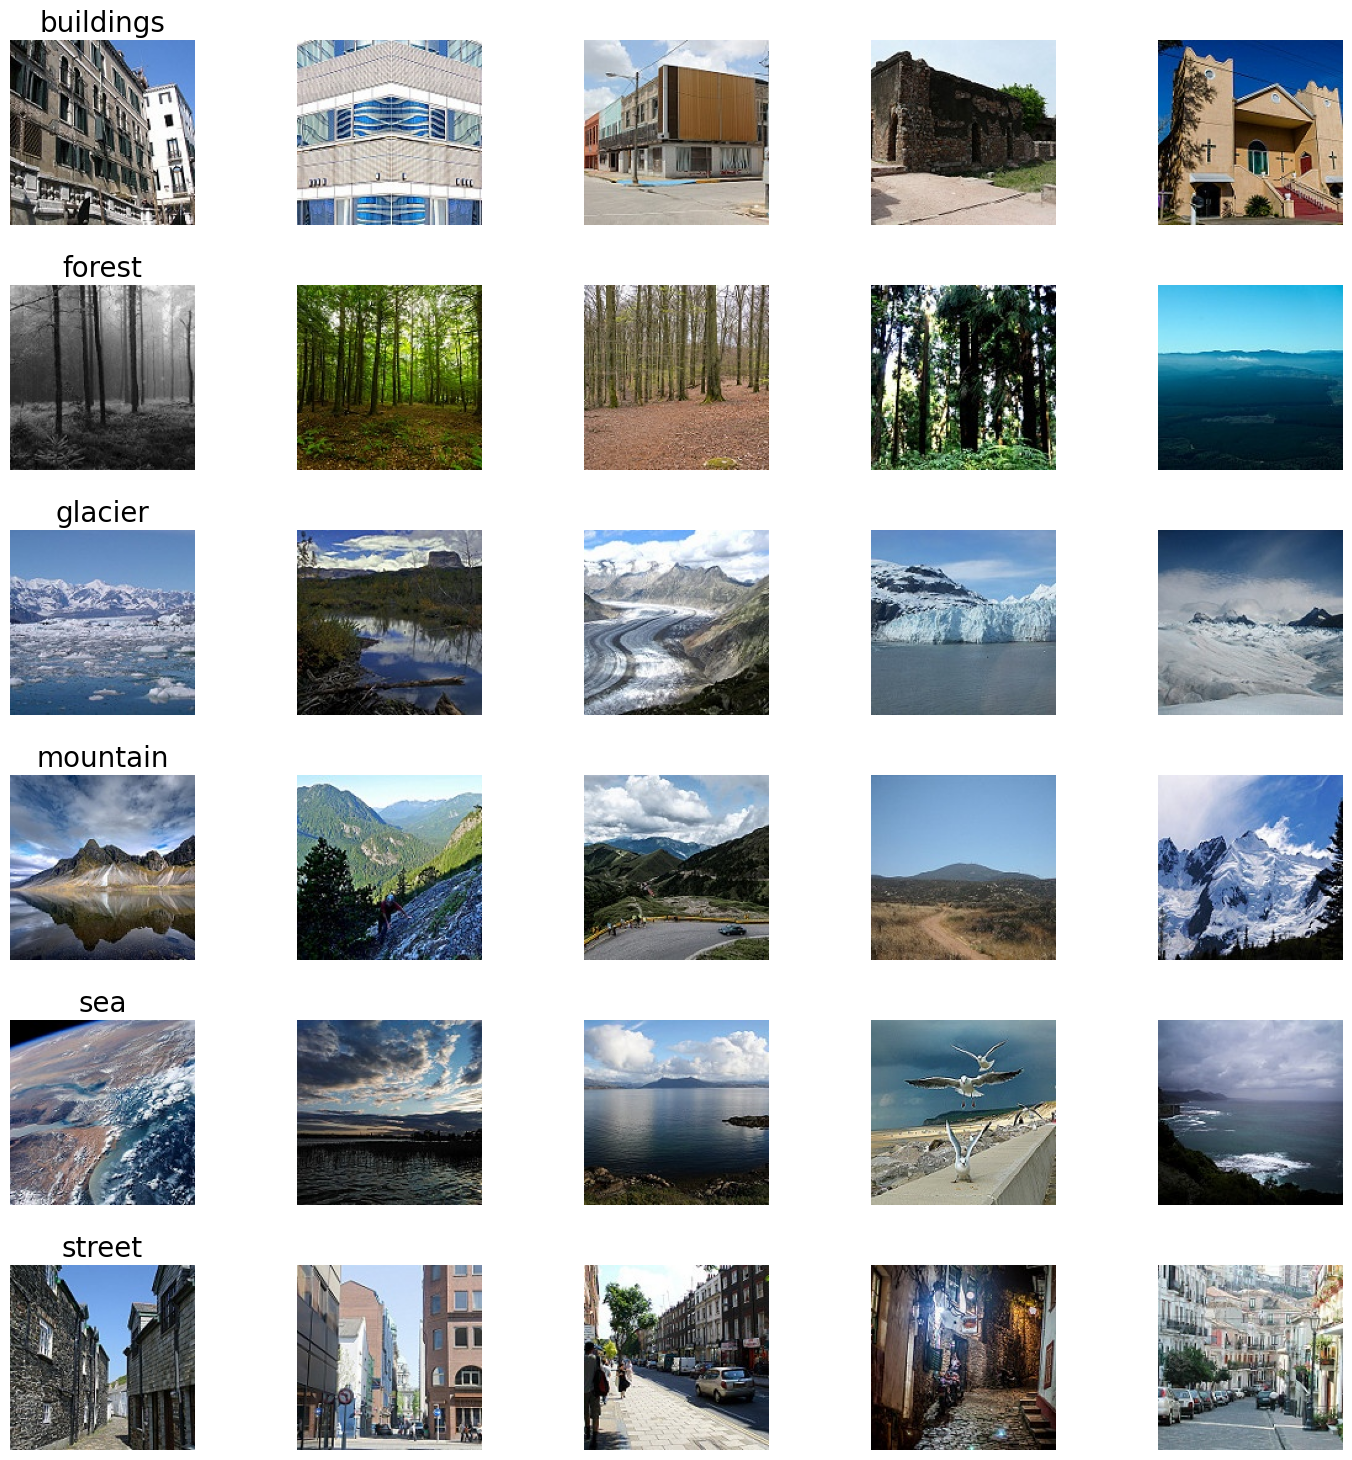

In [ ]:

from PIL import Image

# Define the path to the train folder
train_folder = abspath_curr + ' /dataa/seg_val/seg_val/train'

# Function to display sample images from each class
def display_sample_images(folder_path, num_images_per_class=5):
    fig, axes = plt.subplots(len(os.listdir(folder_path)), num_images_per_class, figsize=(15, 15))

    for i, class_name in enumerate(sorted(os.listdir(folder_path))):
        class_path = os.path.join(folder_path, class_name)
        image_files = os.listdir(class_path)[:num_images_per_class]

        for j, image_file in enumerate(image_files):
            image_path = os.path.join(class_path, image_file)
            image = Image.open(image_path)
            axes[i, j].imshow(image)
            axes[i, j].axis('off')
            if j == 0:
                axes[i, j].set_title(class_name)

    plt.tight_layout()
    plt.show()

# Display sample images from each class in the train dataset
display_sample_images(train_folder)


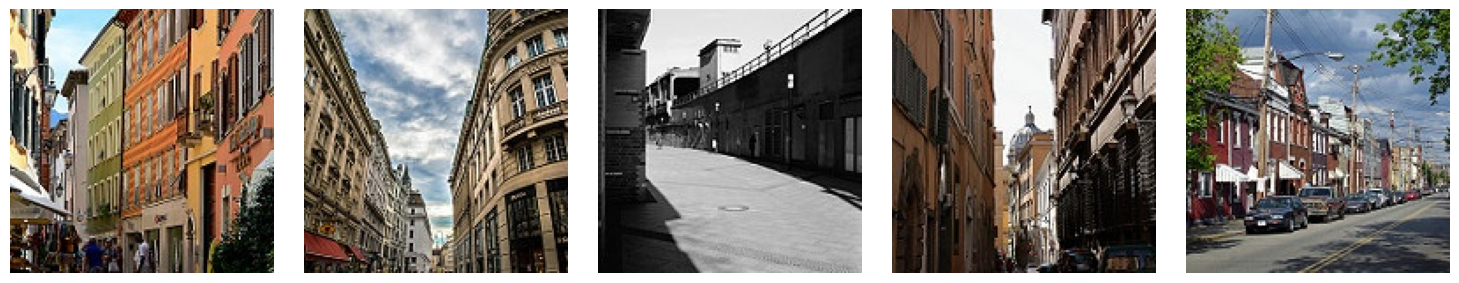

In [ ]:
import matplotlib.pyplot as plt
import os
from PIL import Image

# Define the path to the test folder
test_folder = abspath_curr + ' /dataa/seg_test/seg_test'

# Function to display sample images from the test dataset
def display_sample_images(folder_path, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    # Get list of subdirectories (classes) in the folder
    subfolders = [subfolder for subfolder in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, subfolder))]

    # Iterate over subdirectories to find image files
    for i, subfolder in enumerate(subfolders):
        subfolder_path = os.path.join(folder_path, subfolder)
        image_files = os.listdir(subfolder_path)[:num_images]

        # Display each image
        for j, image_file in enumerate(image_files):
            image_path = os.path.join(subfolder_path, image_file)
            image = Image.open(image_path)
            axes[j].imshow(image)
            axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Display sample images from the test dataset
display_sample_images(test_folder)


# **Resizing the data for pretrained model**

In [ ]:
# Set the default input size for the pretrained model
global input_size
input_size = [224, 224]

# **Preprocessing the data using pretrained model**

In [ ]:
test_folder = abspath_curr + ' /dataa/seg_test/seg_test'

train_folder = abspath_curr + ' /dataa/seg_val/seg_val/train'
val_folder = abspath_curr + ' /dataa/seg_val/seg_val/val'


In [ ]:
# Rename your existing datasets to match the desired names
# Load the datasets from directory
data_train = tf.keras.utils.image_dataset_from_directory(train_folder,
                                                         image_size=(img_height, img_width),
                                                         batch_size=batch_size,
                                                         shuffle=True,
                                                         seed=1337)

data_test = tf.keras.utils.image_dataset_from_directory(test_folder,
                                                        image_size=(img_height, img_width),
                                                        batch_size=batch_size,
                                                        shuffle=True,
                                                        seed=1337)

data_valid = tf.keras.utils.image_dataset_from_directory(val_folder,
                                                         image_size=(img_height, img_width),
                                                         batch_size=batch_size,
                                                         shuffle=True,
                                                         seed=1337)



Found 11224 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.
Found 2810 files belonging to 6 classes.


In [ ]:
# Set the preprocess_input of the pretrained model
global preprocess_input
preprocess_input = tf.keras.applications.resnet.preprocess_input

In [ ]:
# Preprocess the training data using pretrained model
data_train = data_train.map(preprocess_pretrain)

# Preprocess the validation data using pretrained model
data_valid = data_valid.map(preprocess_pretrain)

# Preprocess the test data using pretrained model
data_test = data_test.map(preprocess_pretrain)

# Training

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/model/')
if not os.path.exists(directory):
    os.makedirs(directory)

In [ ]:


# Number of classes
n_classes = 6

# Add the pretrained layers
pretrained_model = keras.applications.ResNet50(include_top=False, weights='imagenet')

# Freeze the pretrained layers
for layer in pretrained_model.layers:
    layer.trainable = False

# Add GlobalAveragePooling2D layer
average_pooling = keras.layers.GlobalAveragePooling2D()(pretrained_model.output)

# Add the output layer
output = keras.layers.Dense(n_classes, activation='softmax')(average_pooling)

# Get the model
model = keras.Model(inputs=pretrained_model.input, outputs=output)

# Print model summary
model.summary()


94765736/94765736 [==============================] - 5s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                         

# **Freezing the pretrained layers**

In [ ]:
# For each layer in the pretrained model
for layer in pretrained_model.layers:
    # Freeze the layer
    layer.trainable = False

# **Setting Callbacks**


In [ ]:
# ModelCheckpoint callback
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=abspath_curr + '/result/model/model.h5',
                                                      save_best_only=True,
                                                      save_weights_only=True)

# EarlyStopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

# ReduceLROnPlateau callback
reduce_lr_on_plateau_cb = keras.callbacks.ReduceLROnPlateau(factor=0.1,
                                                            patience=1)

# **Compiling the model**


In [ ]:
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# **Training the model**

In [ ]:
# Train, evaluate and save the best model
history = model.fit(data_train,
                    epochs=5,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/5


Copying files: 81 files [23:50, 17.66s/ files]


351/351 [==============================] - 111s 252ms/step - loss: 0.5415 - accuracy: 0.8879 - val_loss: 0.6388 - val_accuracy: 0.8947 - lr: 0.0100
Epoch 2/5
351/351 [==============================] - 89s 251ms/step - loss: 0.3435 - accuracy: 0.9266 - val_loss: 0.6405 - val_accuracy: 0.9103 - lr: 0.0100
Epoch 3/5
351/351 [==============================] - 88s 247ms/step - loss: 0.1735 - accuracy: 0.9551 - val_loss: 0.4813 - val_accuracy: 0.9199 - lr: 1.0000e-03
Epoch 4/5
351/351 [==============================] - 88s 246ms/step - loss: 0.1259 - accuracy: 0.9625 - val_loss: 0.4630 - val_accuracy: 0.9185 - lr: 1.0000e-03
Epoch 5/5
351/351 [==============================] - 84s 236ms/step - loss: 0.1007 - accuracy: 0.9673 - val_loss: 0.4417 - val_accuracy: 0.9139 - lr: 1.0000e-03


# **Plotting the learning curve**


**Creating the directory for the figure**

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

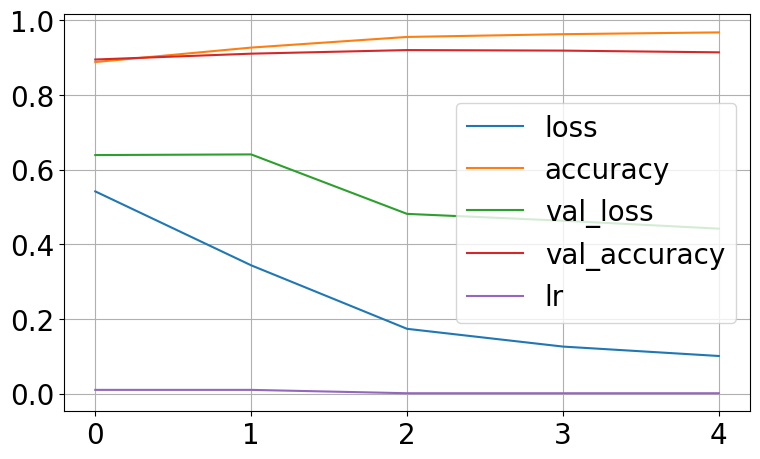

In [ ]:
import pandas as pd

# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/learning_curve_before_unfreezing.pdf')
plt.show()

# Testing

**Loading the saved model**

In [ ]:
# Load the saved model
model.load_weights(filepath=abspath_curr + '/result/model/model.h5')

**Evaluating the model**

In [ ]:
loss, accuracy = model.evaluate(data_test)

94/94 [==============================] - 18s 179ms/step - loss: 0.3627 - accuracy: 0.9170


# **Citation**

The code used for this final project is combination of professor code gotten from the GitHub repo of Prof Yuxiao Huang, Data Science Program, Columbian College of Arts & Sciences, George Washington University.

The original code can be accessed [Here](https://github.com/yuxiaohuang/teaching/blob/main/machine_learning_I/spring_2024/code/p3_deep_learning/p3_c2_supervised_learning/p3_c2_s3_convolutional_neural_networks/case_study/case_study.ipynb)

